In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import regex as re


In [157]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/spam.csv")

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [159]:
df.sample(10)

,Category,Message
1836,ham,* Will be september by then!
699,ham,Mum ask ü to buy food home...
5459,ham,If you hear a loud scream in about &lt;#&gt; m...
2295,spam,You have 1 new message. Please call 08718738034.
2262,ham,Did you show him and wot did he say or could u...
1884,ham,"Come to me, slave. Your doing it again ... Goi..."
5108,ham,The sign of maturity is not when we start sayi...
1849,ham,I dont want to hear philosophy. Just say what ...
3195,ham,And you! Will expect you whenever you text! Ho...
4294,ham,You best watch what you say cause I get drunk ...


In [160]:
df['result'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0).astype(int)

df['Category'].value_counts() #El dataset no esta balanceado

Category
ham     4825
spam     747
Name: count, dtype: int64

In [161]:
df = df.drop_duplicates()

In [162]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]',' ',text)
    text = text.strip()
    text = re.sub(r'\s+',' ',text)
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    return text.split()

In [163]:
my_text = 'Dog$'

my_text_clean = re.sub(r'[^a-zA-Z]','.',my_text)
print(my_text_clean)

Dog.


In [164]:
df['Message'] = df['Message'].apply(preprocess_text)

df

,Category,Message,result
0,ham,"[go, until, jurong, point, crazy, available, o...",0
1,ham,"[ok, lar, joking, wif, u, oni]",0
2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ...",1
3,ham,"[u, dun, say, so, early, hor, u, c, already, t...",0
4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,...",0
...,...,...,...
5567,spam,"[this, is, the, nd, time, we, have, tried, con...",1
5568,ham,"[will, b, going, to, esplanade, fr, home]",0
5569,ham,"[pity, was, in, mood, for, that, so, any, othe...",0
5570,ham,"[the, guy, did, some, bitching, but, i, acted,...",0


In [165]:
df.sample(10)

,Category,Message,result
1103,ham,"[black, shirt, n, blue, jeans, i, thk, i, c]",0
4760,spam,"[thanks, your, continued, support, your, quest...",1
2175,ham,"[see, i, thought, it, all, through]",0
1014,ham,"[just, buy, a, pizza, meat, lovers, or, suprem...",0
3720,spam,"[thanks, for, your, ringtone, order, reference...",1
5242,ham,"[hmm, thinking, lor]",0
565,ham,"[fuck, babe, i, miss, you, already, you, know,...",0
5405,ham,"[so, how, many, days, since, then]",0
4649,ham,"[we, are, okay, going, to, sleep, now, later]",0
3378,ham,"[yup, wun, believe, wat, u, really, neva, c, e...",0


In [166]:
my_wrong_text = 'Jimmy iz a good fella'

my_clean_text = re.sub('iz','is',my_wrong_text)

my_clean_text

'Jimmy is a good fella'

In [167]:
download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [168]:
download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [169]:
lemmatizer = WordNetLemmatizer() #Lemma: llevarlo a la raiz mas sencilla de la palabra: [running, runner, ran] = run
stop_words = stopwords.words('english') #Un diccionario fijo de todas las palabras que no son necesarias. Las elimina del texto.

In [170]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [171]:
def lemmatize_text(words, lemmatizer=lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 2]
    return tokens

df['Message'] = df['Message'].apply(lemmatize_text)

In [172]:
from wordcloud import WordCloud

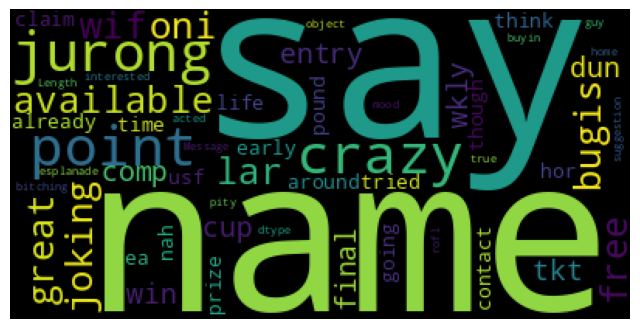

In [174]:
wordcloud = WordCloud(max_words=1000).generate(str(df['Message']))

fig = plt.figure(figsize=(8,8))

plt.axis('off')

plt.imshow(wordcloud)

plt.show()

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [177]:
df_list = df['Message']

df_list = [' '.join(tokens) for tokens in df_list]

vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=5)

X = vectorizer.fit_transform(df_list).toarray()

y = df['Category']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [179]:
model = SVC(kernel='linear', random_state=2030)

model.fit(X_train, y_train)

SVC(kernel='linear', random_state=2030)

In [180]:
y_hat = model.predict(X_test)

In [181]:
accuracy_score(y_test,y_hat)

0.9844961240310077